# MODELO ESCOLHIDO

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.offline import iplot

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
import keras 
from keras.models import Sequential
from keras.optimizers import Adam, Adamax
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPooling2D, Flatten, Dense,BatchNormalization,GlobalAveragePooling2D,Conv2D,Dropout,Flatten,Rescaling,Input
from keras import regularizers
from keras.callbacks import EarlyStopping,ModelCheckpoint

import os
import random
import cv2

from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam

# Tentar usar GPU

In [28]:
# Configurar o TensorFlow para usar a GPU
import tensorflow as tf
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    try:
        tf.config.experimental.set_memory_growth(physical_devices[0], True)
        print("GPU is available and configured.")
    except RuntimeError as e:
        print(e)
else:
    print("GPU is not available, using CPU instead.")

print("ok")

GPU is not available, using CPU instead.
ok


In [29]:
data_path = r"C:\pastaImagensMangas"
img_size = (224,224)
batch_size = 32
mode = "rgb"
epochs = 50

In [30]:
def df_maker(path):
    file_paths = []
    labels = []

    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path,fold)
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path,file)
            file_paths.append(file_path)
            labels.append(fold)


    file_series = pd.Series(file_paths,name="file_paths")
    label_series = pd.Series(labels,name="labels")

    df = pd.concat([file_series,label_series],axis=1)
    return df

In [31]:
df = df_maker(data_path)

In [32]:
df

,file_paths,labels
0,C:\pastaImagensMangas\Anthracnose\20211008_124...,Anthracnose
1,C:\pastaImagensMangas\Anthracnose\20211008_124...,Anthracnose
2,C:\pastaImagensMangas\Anthracnose\20211008_124...,Anthracnose
3,C:\pastaImagensMangas\Anthracnose\20211008_124...,Anthracnose
4,C:\pastaImagensMangas\Anthracnose\20211008_124...,Anthracnose
...,...,...
3995,C:\pastaImagensMangas\Sooty Mould\IMG_20211212...,Sooty Mould
3996,C:\pastaImagensMangas\Sooty Mould\IMG_20211212...,Sooty Mould
3997,C:\pastaImagensMangas\Sooty Mould\IMG_20211212...,Sooty Mould
3998,C:\pastaImagensMangas\Sooty Mould\IMG_20211212...,Sooty Mould


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   file_paths  4000 non-null   object
 1   labels      4000 non-null   object
dtypes: object(2)
memory usage: 62.6+ KB


In [34]:
train_df,test_val_df= train_test_split(df ,train_size= 0.8, shuffle= True, random_state= 7, stratify=df["labels"])

In [35]:
test_df,val_df= train_test_split(test_val_df ,train_size= 0.5, shuffle= True, random_state= 7, stratify=test_val_df["labels"])

In [36]:
train_df

,file_paths,labels
259,C:\pastaImagensMangas\Anthracnose\IMG_20211011...,Anthracnose
3841,C:\pastaImagensMangas\Sooty Mould\IMG_20211211...,Sooty Mould
2618,C:\pastaImagensMangas\Healthy\20211231_125103 ...,Healthy
1816,C:\pastaImagensMangas\Die Back\20211129_163933...,Die Back
3197,C:\pastaImagensMangas\Powdery Mildew\IMG_20211...,Powdery Mildew
...,...,...
3784,C:\pastaImagensMangas\Sooty Mould\IMG_20211108...,Sooty Mould
1777,C:\pastaImagensMangas\Die Back\20211129_163119...,Die Back
2405,C:\pastaImagensMangas\Gall Midge\IMG_20211106_...,Gall Midge
856,C:\pastaImagensMangas\Bacterial Canker\IMG_202...,Bacterial Canker


In [37]:
test_df

,file_paths,labels
1086,C:\pastaImagensMangas\Cutting Weevil\20211011_...,Cutting Weevil
1559,C:\pastaImagensMangas\Die Back\20211129_160913...,Die Back
3704,C:\pastaImagensMangas\Sooty Mould\IMG_20211108...,Sooty Mould
3252,C:\pastaImagensMangas\Powdery Mildew\IMG_20211...,Powdery Mildew
2681,C:\pastaImagensMangas\Healthy\20211231_154828 ...,Healthy
...,...,...
2224,C:\pastaImagensMangas\Gall Midge\IMG_20211106_...,Gall Midge
2286,C:\pastaImagensMangas\Gall Midge\IMG_20211106_...,Gall Midge
3373,C:\pastaImagensMangas\Powdery Mildew\IMG_20211...,Powdery Mildew
152,C:\pastaImagensMangas\Anthracnose\20211011_170...,Anthracnose


In [38]:
val_df

,file_paths,labels
2202,C:\pastaImagensMangas\Gall Midge\IMG_20211106_...,Gall Midge
437,C:\pastaImagensMangas\Anthracnose\IMG_20211011...,Anthracnose
2536,C:\pastaImagensMangas\Healthy\20211231_123716 ...,Healthy
912,C:\pastaImagensMangas\Bacterial Canker\IMG_202...,Bacterial Canker
440,C:\pastaImagensMangas\Anthracnose\IMG_20211011...,Anthracnose
...,...,...
2076,C:\pastaImagensMangas\Gall Midge\IMG_20211106_...,Gall Midge
2473,C:\pastaImagensMangas\Gall Midge\IMG_20211106_...,Gall Midge
2253,C:\pastaImagensMangas\Gall Midge\IMG_20211106_...,Gall Midge
617,C:\pastaImagensMangas\Bacterial Canker\IMG_202...,Bacterial Canker


In [39]:
df.labels.value_counts()

labels
Anthracnose         500
Bacterial Canker    500
Cutting Weevil      500
Die Back            500
Gall Midge          500
Healthy             500
Powdery Mildew      500
Sooty Mould         500
Name: count, dtype: int64

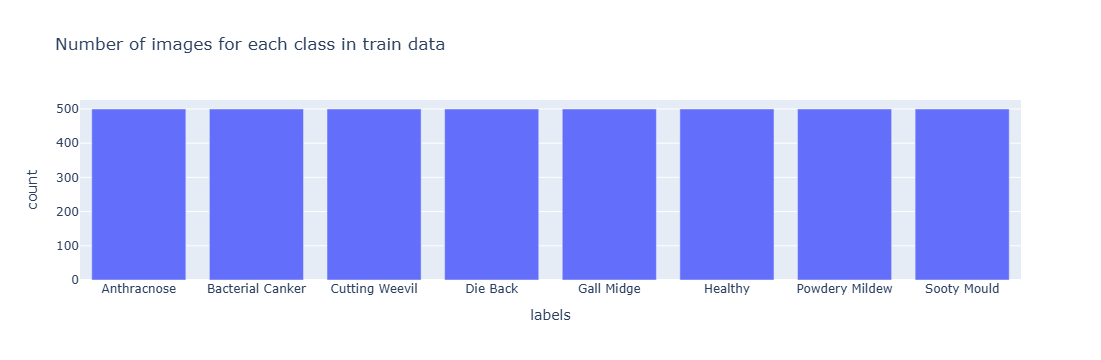

In [40]:
iplot(px.bar(
    data_frame = df.labels.value_counts().reset_index(),
    x="labels",
    y="count",
    title="Number of images for each class in train data"
))

In [41]:
train_datagen = ImageDataGenerator()
test_datagen = ImageDataGenerator()
val_datagen = ImageDataGenerator()

In [42]:
train_data = train_datagen.flow_from_dataframe(
    train_df,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    color_mode= mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)
test_data = test_datagen.flow_from_dataframe(
    test_df,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    color_mode= mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=False,
)
val_data = val_datagen.flow_from_dataframe(
    val_df,
    x_col = "file_paths",
    y_col = "labels",
    target_size=img_size,
    color_mode= mode,
    class_mode='categorical',
    batch_size=batch_size,
    shuffle=True,
)

Found 3200 validated image filenames belonging to 8 classes.
Found 400 validated image filenames belonging to 8 classes.
Found 400 validated image filenames belonging to 8 classes.


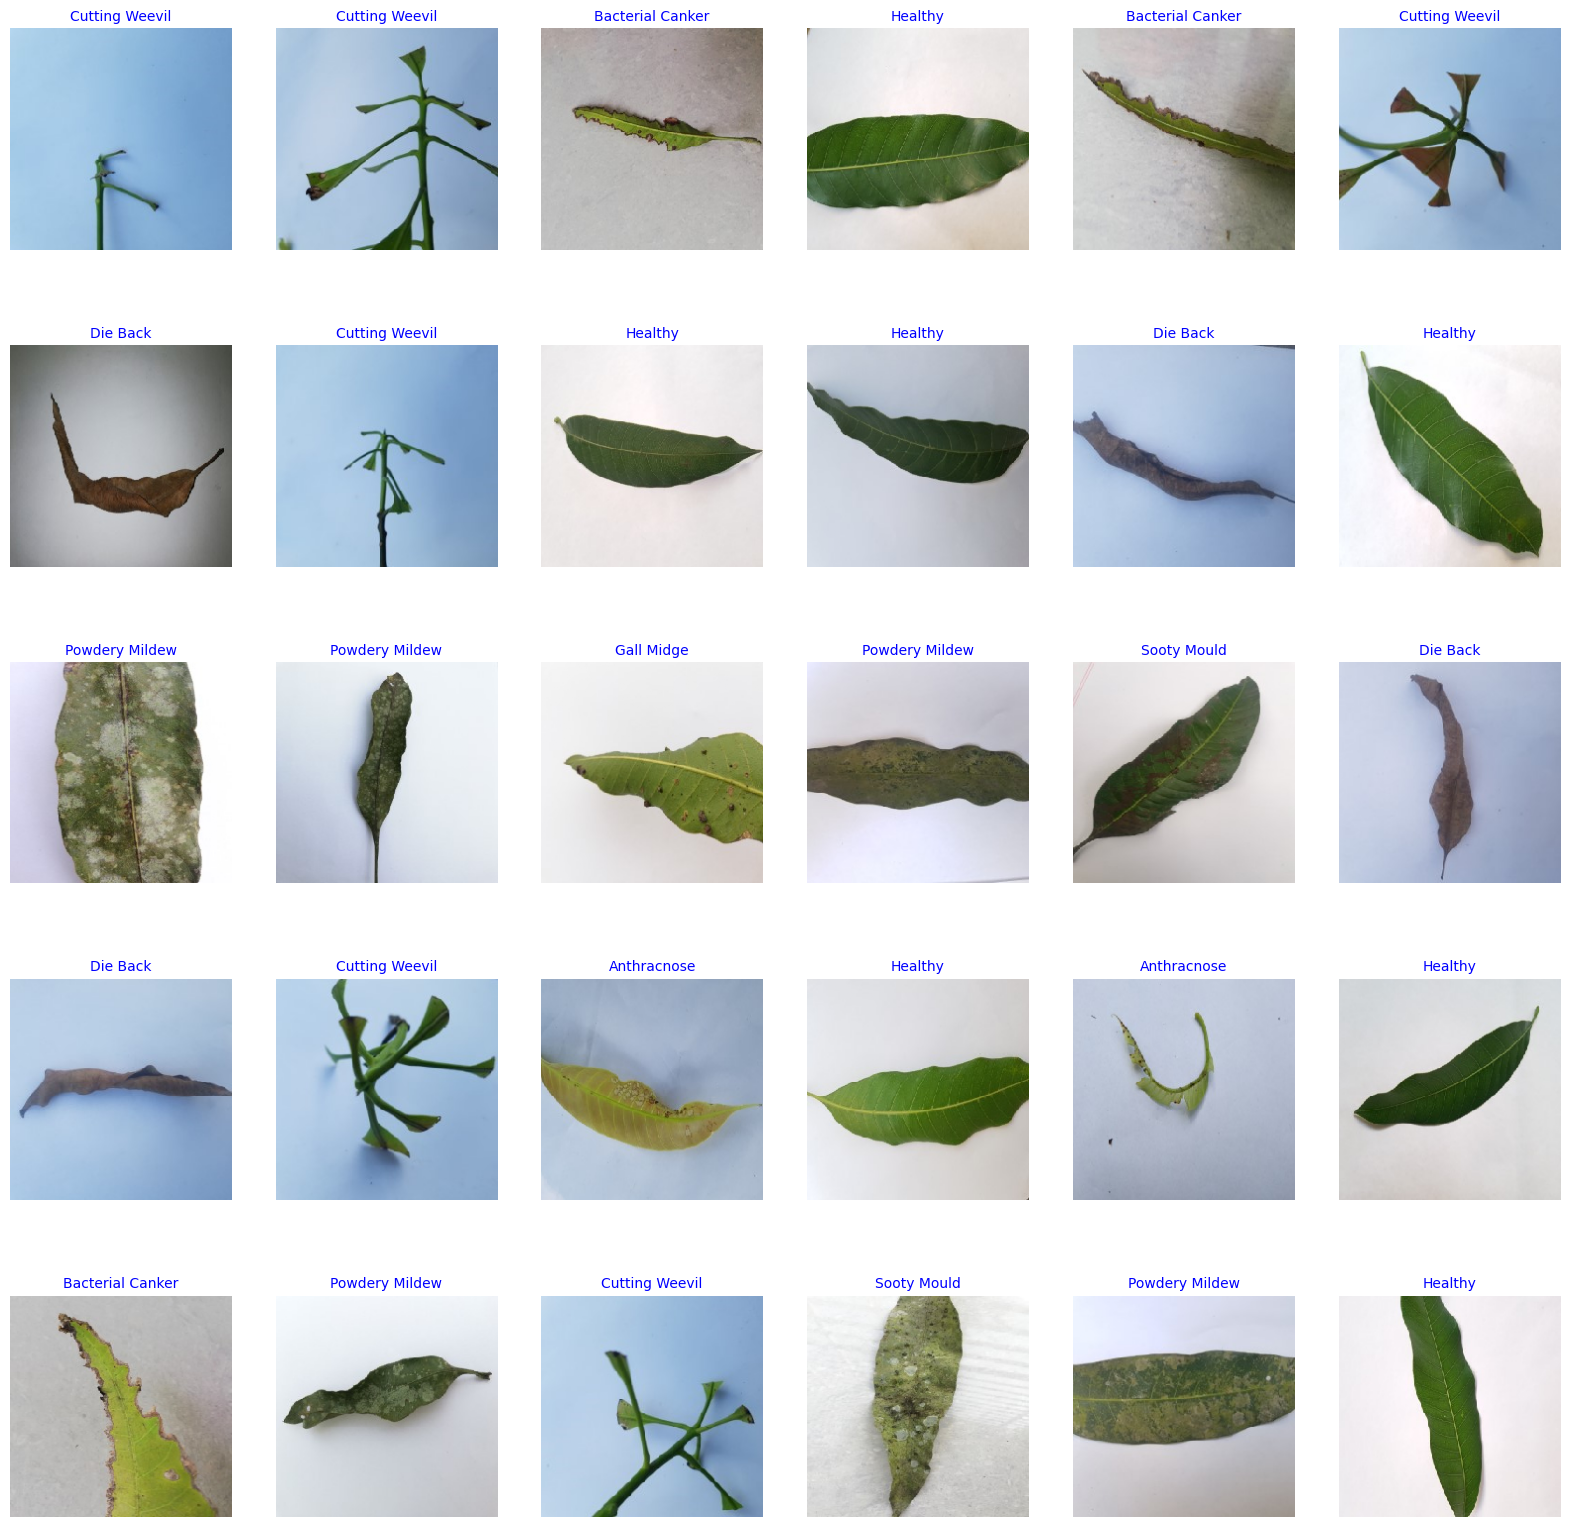

In [43]:
g_dict = train_data.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_data)      # get a batch size samples from the generator
# # difference between next iterator and for iterator


plt.figure(figsize= (20, 24))

for i in range(30):
    plt.subplot(6, 6, i + 1)
    image = images[i]/255
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 10)
    plt.axis('off')

In [44]:
# Carregar a ResNet50 pré-treinada com a camada fully connected no topo
base_model = ResNet50(weights='imagenet', include_top=True, input_shape=(224, 224, 3))

In [45]:
# Remover a camada fully connected original (a última camada)
base_model.layers.pop()

# Congelar todas as camadas da ResNet50 para evitar que sejam treinadas novamente
for layer in base_model.layers:
    layer.trainable = False

# Adicionar uma nova camada de saída com 8 neurônios (para 8 classes)
output = Dense(8, activation='softmax', name='new_output')(base_model.layers[-1].output)

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=output)

# Compilar o modelo
model.compile(optimizer=Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [46]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_1[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,644,720 (97.83 MB)

 Trainable params: 8,008 (31.28 KB)

 Non-trainable params: 25,636,712 (97.80 MB)

In [22]:
# Callbacks para parada antecipada e salvamento do melhor modelo
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_ResNet50_versao999.keras', monitor='val_loss', save_best_only=True)

In [23]:
# Treinar o modelo
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=epochs,
    callbacks=[early_stopping, model_checkpoint]
)

C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



Epoch 1/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 200s 2s/step - accuracy: 0.0854 - loss: 2.0796 - val_accuracy: 0.1500 - val_loss: 2.0754
Epoch 2/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.1893 - loss: 2.0741 - val_accuracy: 0.2725 - val_loss: 2.0703
Epoch 3/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.2694 - loss: 2.0694 - val_accuracy: 0.3600 - val_loss: 2.0652
Epoch 4/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.3432 - loss: 2.0640 - val_accuracy: 0.4375 - val_loss: 2.0602
Epoch 5/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.4267 - loss: 2.0590 - val_accuracy: 0.4875 - val_loss: 2.0552
Epoch 6/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.4825 - loss: 2.0547 - val_accuracy: 0.5275 - val_loss: 2.0502
Epoch 7/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.5211 - loss: 2.0492 - val_accuracy: 0.5675 - val_loss: 2.0452
Epoch 8/50
100/100 ━━━━━━━━━━━━━━━━━━━━ 191s 2s/step - accuracy: 0.5561 - loss: 2.0450 - val_accu

In [24]:
# Salvar o modelo após o treinamento
model_save_path = "ResNet50FolhasMangasVersao999.keras"
model.save(model_save_path)
print(f"Modelo salvo em {model_save_path}")

Modelo salvo em ResNet50FolhasMangasVersao999.keras


In [47]:
# Carregar o modelo salvo
model_save_path = "ResNet50FolhasMangasVersao999.keras"
from tensorflow.keras.models import load_model
loaded_model = load_model(model_save_path)
print("Modelo carregado com sucesso!")

Modelo carregado com sucesso!


In [26]:
loaded_model.evaluate(test_data)

13/13 ━━━━━━━━━━━━━━━━━━━━ 24s 2s/step - accuracy: 0.6414 - loss: 1.8589


[1.8594322204589844, 0.6399999856948853]

In [27]:
# Avaliar o modelo carregado no conjunto de teste
loss, accuracy = loaded_model.evaluate(test_data)
print(f"Test Loss (modelo carregado): {loss}")
print(f"Test Accuracy (modelo carregado): {accuracy}")

13/13 ━━━━━━━━━━━━━━━━━━━━ 21s 2s/step - accuracy: 0.6414 - loss: 1.8589
Test Loss (modelo carregado): 1.8594322204589844
Test Accuracy (modelo carregado): 0.6399999856948853


In [28]:
vals = pd.DataFrame(history.history)
vals = vals.rename(columns={"loss":"Train Loss","val_loss":"Validation Loss","accuracy":"Train Accuracy","val_accuracy":"Validation Accuracy"})

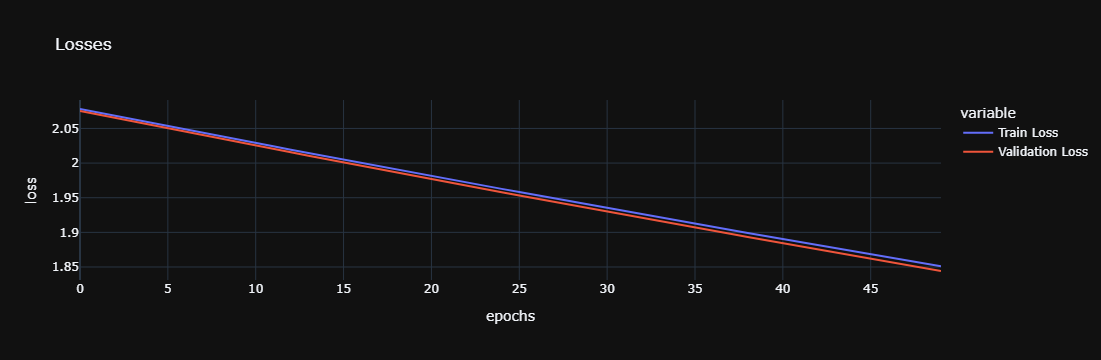

In [29]:
iplot(px.line(data_frame=vals,
              y = ["Train Loss","Validation Loss"],
              labels={"index":"epochs","value":"loss"},
              title = "Losses",
              template="plotly_dark"))

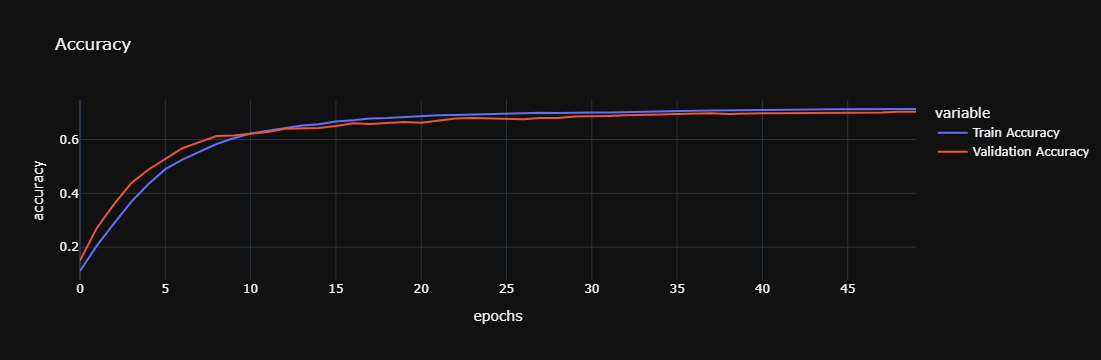

In [30]:
iplot(px.line(data_frame=vals,
              y = ["Train Accuracy","Validation Accuracy"],
              labels={"index":"epochs","value":"accuracy"},
              title = "Accuracy",
              template="plotly_dark"))

In [48]:
# Gerar o classification report com o modelo carregado
test_predictions = loaded_model.predict(test_data)
y_pred = np.argmax(test_predictions, axis=1) #test_predictions
y_true = test_data.classes #true_labels
class_labels = list(test_data.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_labels)


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



13/13 ━━━━━━━━━━━━━━━━━━━━ 9s 646ms/step


In [49]:
print(report)

                  precision    recall  f1-score   support

     Anthracnose       0.34      0.46      0.39        50
Bacterial Canker       0.61      0.60      0.61        50
  Cutting Weevil       1.00      0.96      0.98        50
        Die Back       0.67      0.84      0.74        50
      Gall Midge       0.62      0.70      0.66        50
         Healthy       0.73      0.66      0.69        50
  Powdery Mildew       0.80      0.56      0.66        50
     Sooty Mould       0.46      0.34      0.39        50

        accuracy                           0.64       400
       macro avg       0.65      0.64      0.64       400
    weighted avg       0.65      0.64      0.64       400



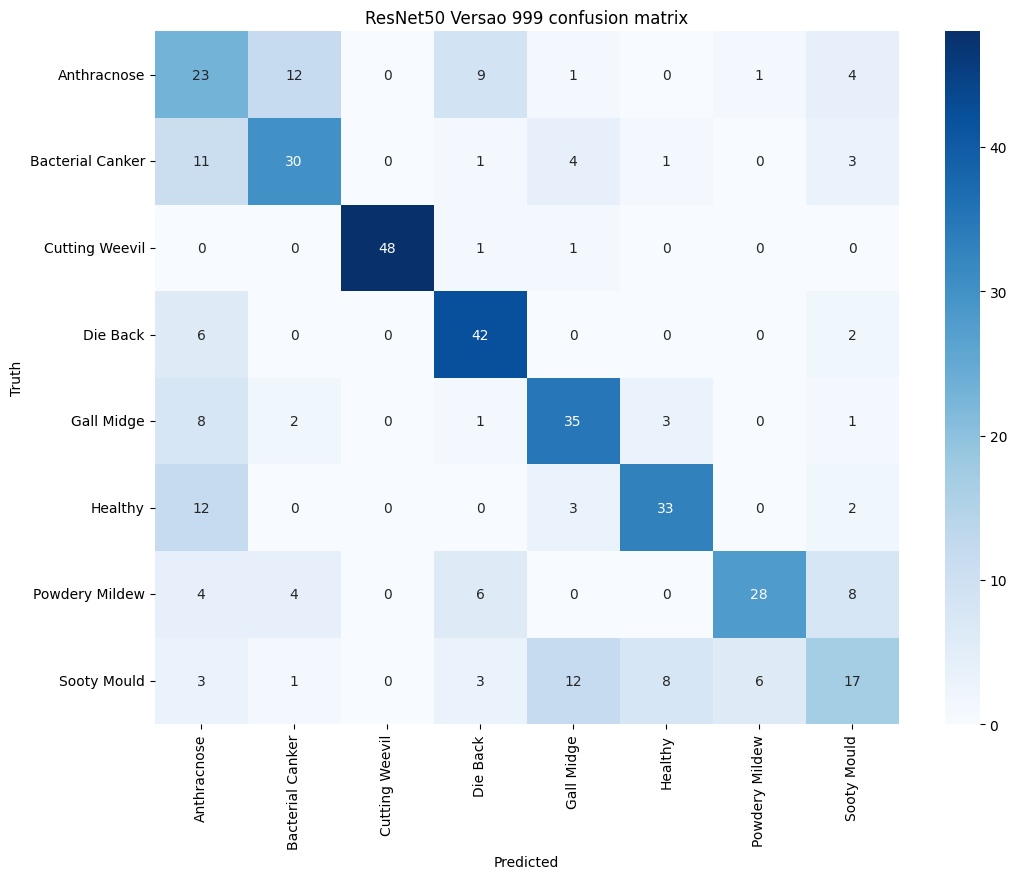

In [50]:
plt.figure(figsize = (12,9))
cm = confusion_matrix(y_true, y_pred)
# sns.heatmap(cm, annot=True,fmt='d',cmap= plt.cm.Blues)
sns.heatmap(cm, cmap='Blues', annot=True, fmt='g', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.title("ResNet50 Versao 999 confusion matrix")
plt.show()

In [53]:
def funcaoParaObterAcuraciaParaMultiClasses(verdade, predicao, numeroDeClasses, ImagensPorClasse):
    
    vetorAuxiliar = [0 for _ in range(numeroDeClasses)]

    for i in range(0, len(predicao)):
        if verdade[i] == predicao[i]:
            vetorAuxiliar[verdade[i]] = vetorAuxiliar[(verdade[i])] + 1

    vetorDeAcuracia = [0, 0, 0, 0, 0, 0, 0, 0]
    
        
    for i in range(0, len(vetorAuxiliar)):
        vetorDeAcuracia[i] = vetorAuxiliar[i]/ImagensPorClasse
        
    return vetorDeAcuracia

nomeDasClasses = ["Anthracnose", "Bacterial Canker", "Cutting Weevil", "Die Back", "Gall Midge", "Healthy", "Powdery Mildew", "Sooty Mould"]

acuracias = funcaoParaObterAcuraciaParaMultiClasses(y_true, y_pred, 8, 50)

print("Acurácias")
for i in range(0, len(nomeDasClasses)):
    print(nomeDasClasses[i], " - ", acuracias[i])



Acurácias
Anthracnose  -  0.46
Bacterial Canker  -  0.6
Cutting Weevil  -  0.96
Die Back  -  0.84
Gall Midge  -  0.7
Healthy  -  0.66
Powdery Mildew  -  0.56
Sooty Mould  -  0.34


# MODELO ORIGINAL

In [54]:
from tensorflow.keras.applications import ResNet50

# Carregar o modelo ResNet50 pré-treinado
resnet_model = ResNet50(weights='imagenet', include_top=True)

# Exibir o resumo do modelo
resnet_model.summary()


Model: "resnet50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)    │ (None, 224, 224, 3)       │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_pad (ZeroPadding2D)     │ (None, 230, 230, 3)       │               0 │ input_layer_2[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_conv (Conv2D)           │ (None, 112, 112, 64)      │           9,472 │ conv1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_bn (BatchNormalization) │ (None, 112, 112, 64)      │             256 │ conv1_conv[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv1_relu (Activation)       │ (None, 112, 112, 64)      │               0 │ conv1_bn[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pad (ZeroPadding2D)     │ (None, 114, 114, 64)      │               0 │ conv1_relu[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ pool1_pool (MaxPooling2D)     │ (None, 56, 56, 64)        │               0 │ pool1_pad[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_conv (Conv2D)  │ (None, 56, 56, 64)        │           4,160 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_1_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_1_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_1_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_conv (Conv2D)  │ (None, 56, 56, 64)        │          36,928 │ conv2_block1_1_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_bn             │ (None, 56, 56, 64)        │             256 │ conv2_block1_2_conv[0][0]  │
│ (BatchNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_2_relu           │ (None, 56, 56, 64)        │               0 │ conv2_block1_2_bn[0][0]    │
│ (Activation)                  │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_0_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ pool1_pool[0][0]           │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ conv2_block1_3_conv (Conv2D)  │ (None, 56, 56, 256)       │          16,640 │ conv2_block1_2_relu[0][0]  │
├───────────────────────────────┼───────────────────────────┼───────────────

 Total params: 25,636,712 (97.80 MB)

 Trainable params: 25,583,592 (97.59 MB)

 Non-trainable params: 53,120 (207.50 KB)

# Avaliando o modelo para os Bancos Corrompidos

Onde vai gerar um classification_report para cada bando e será armazenado em um excel

In [55]:
# Avaliação dos 95 bancos de dados corrompidos (INSERIR CÓDIGO AQUI)
# Função para processar e avaliar cada banco corrompido
import pandas as pd
import numpy as np
import os
from tensorflow import keras

def funcaoParaObterAcuraciaParaMultiClasses(verdade, predicao, numeroDeClasses, ImagensPorClasse):
    
    vetorAuxiliar = [0 for _ in range(numeroDeClasses)]

    for i in range(0, len(predicao)):
        if verdade[i] == predicao[i]:
            vetorAuxiliar[verdade[i]] = vetorAuxiliar[(verdade[i])] + 1

    vetorDeAcuracia = [0, 0, 0, 0, 0, 0, 0, 0]
    
        
    for i in range(0, len(vetorAuxiliar)):
        vetorDeAcuracia[i] = vetorAuxiliar[i]/ImagensPorClasse
        
    return vetorDeAcuracia



def df_maker(path):
    file_paths = []
    labels = []

    # Listando as pastas dentro do diretório base (representam as classes)
    folds = os.listdir(path)
    for fold in folds:
        fold_path = os.path.join(path, fold)
        file_list = os.listdir(fold_path)
        for file in file_list:
            file_path = os.path.join(fold_path, file)
            file_paths.append(file_path)
            labels.append(fold)

    # Criando uma série para caminhos e rótulos
    file_series = pd.Series(file_paths, name="file_paths")
    label_series = pd.Series(labels, name="labels")

    # Concatenando as séries para formar um dataframe
    df = pd.concat([file_series, label_series], axis=1)
    return df



def evaluate_corrupted_model(model, corrupted_data_path, corruption_name):
    # Cria o dataframe com o caminho das imagens e rótulos
    corrupted_df = df_maker(corrupted_data_path)
    
    # Cria o generator para o banco corrompido
    corrupted_datagen = ImageDataGenerator()
    corrupted_data = corrupted_datagen.flow_from_dataframe(
        corrupted_df,
        x_col="file_paths",
        y_col="labels",
        target_size=(224, 224),
        color_mode=mode,
        class_mode='categorical',
        batch_size=batch_size,
        shuffle=False,
    )

    # Realiza as predições
    predictions = model.predict(corrupted_data)
    y_pred = np.argmax(predictions, axis=1)
    y_true = corrupted_data.classes

    # Calcula e coleta métricas
    report = classification_report(y_true, y_pred, output_dict=True, zero_division = 0)
    report['corruption'] = corruption_name  # Adiciona o nome da corrupção para referência
    
    acuraciaPorClasse = funcaoParaObterAcuraciaParaMultiClasses(y_true, y_pred, 8, ImagensPorClasse=500)

    report['acuraciaPorClasse'] = acuraciaPorClasse
    
    return report

# Para carregar depois
model = keras.models.load_model('ResNet50FolhasMangasVersao999.keras')

base_path = r"C:\criacaoBanco\bancos"

corruption_types = [
    "Brightness", "Contrast", "Defocus Blur", "Elastic", "Fog",
    "Frost", "Gaussian Blur", "Gaussian Noise", "Glass Blur",
    "Impulse Noise", "JPEG", "Motion Blur", "Pixelate", "Saturate",
    "Shot Noise", "Snow", "Spatter", "Speckle Noise", "Zoom Blur"
]

severities = [1, 2, 3, 4, 5]

corrupted_paths = [
    os.path.join(base_path, f"{corruption}_severity_{severity}")
    for corruption in corruption_types
    for severity in severities
]

# Avaliação de todos os bancos
results = []
# Validar caminhos
for path in corrupted_paths:
    if not os.path.exists(path):
        print(f"Aviso: O caminho {path} não existe e será ignorado.")
        continue
    corruption_name = os.path.basename(path).replace("_", " ")
    print(corruption_name)
    report = evaluate_corrupted_model(model, path, corruption_name)
    results.append(report)


# Criar e salvar DataFrame
results_df = pd.DataFrame(results)
results_df.to_csv("resultadosDaResNet50ParaCadaBancoModeloEscolhido.csv", index=False)

Brightness severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 495ms/step
Brightness severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 505ms/step
Brightness severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 523ms/step
Brightness severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 66s 524ms/step
Brightness severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 66s 528ms/step
Contrast severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Contrast severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 503ms/step
Contrast severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Contrast severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Contrast severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Defocus Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 503ms/step
Defocus Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 500ms/step
Defocus Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 500ms/step
Defocus Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 501ms/step
Defocus Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Elastic severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Elastic severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 500ms/step
Elastic severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Elastic severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Elastic severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 501ms/step
Fog severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 500ms/step
Fog severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 507ms/step
Fog severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 501ms/step
Fog severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Fog severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Frost severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 500ms/step
Frost severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Frost severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Frost severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Frost severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Gaussian Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Gaussian Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 496ms/step
Gaussian Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Gaussian Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Gaussian Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Gaussian Noise severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Gaussian Noise severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Gaussian Noise severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 503ms/step
Gaussian Noise severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 521ms/step
Gaussian Noise severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 65s 519ms/step
Glass Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 500ms/step
Glass Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Glass Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Glass Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Glass Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Impulse Noise severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Impulse Noise severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 500ms/step
Impulse Noise severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 501ms/step
Impulse Noise severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 500ms/step
Impulse Noise severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 500ms/step
JPEG severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
JPEG severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
JPEG severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
JPEG severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
JPEG severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Motion Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Motion Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Motion Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Motion Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 506ms/step
Motion Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Pixelate severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Pixelate severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 507ms/step
Pixelate severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 500ms/step
Pixelate severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Pixelate severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Saturate severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Saturate severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Saturate severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Saturate severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Saturate severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Shot Noise severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 500ms/step
Shot Noise severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Shot Noise severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Shot Noise severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Shot Noise severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 501ms/step
Snow severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Snow severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Snow severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Snow severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Snow severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Spatter severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Spatter severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 497ms/step
Spatter severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Spatter severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 496ms/step
Spatter severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Speckle Noise severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 498ms/step
Speckle Noise severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 504ms/step
Speckle Noise severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Speckle Noise severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Speckle Noise severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 499ms/step
Zoom Blur severity 1
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 507ms/step
Zoom Blur severity 2
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 500ms/step
Zoom Blur severity 3
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 500ms/step
Zoom Blur severity 4
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 62s 500ms/step
Zoom Blur severity 5
Found 4000 validated image filenames belonging to 8 classes.


C:\Users\Gabriel Vitorino\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning:

Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.



125/125 ━━━━━━━━━━━━━━━━━━━━ 63s 500ms/step


# Tabela métricas gerais de cada Banco Corrompido e sua severidade

Tabela no excel com as métricas gerais de cada banco

In [56]:
import pandas as pd
import ast

# Caminho do arquivo .xlsx
caminho_arquivo = r"C:\projeto\resultadosDaResNet50ParaCadaBancoModeloEscolhido.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['macro avg', 'accuracy', 'corruption']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

# Inicializar variáveis para somar os valores
somaPrecision = 0
somaRecall = 0
somaF1Score = 0
somaAcuracia = 0

# Criar um novo DataFrame para armazenar os resultados
novodf = pd.DataFrame(columns=['precision', 'recall', 'f1-score', 'corruption', 'acuracia'])

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    try:
        # Converter a string da coluna 'macro avg' em um dicionário
        dicionario = ast.literal_eval(row['macro avg'])
        
        # Somar os valores
        somaPrecision += dicionario['precision']
        somaRecall += dicionario['recall']
        somaF1Score += dicionario['f1-score']
        somaAcuracia += row['accuracy']
        
        # Adicionar uma nova linha ao novo DataFrame
        novalinha = {
            'precision': dicionario['precision'],
            'recall': dicionario['recall'],
            'f1-score': dicionario['f1-score'],
            'corruption': row['corruption'],
            'acuracia': row['accuracy']
        }
        
        # Usar pd.concat para adicionar a nova linha
        novodf = pd.concat([novodf, pd.DataFrame([novalinha])], ignore_index=True)
    
    except (ValueError, SyntaxError):
        # Caso ocorra um erro ao converter a string para dicionário
        print(f"Erro ao processar a linha {index}: {row['macro avg']}")
        continue

# Calcular as médias
total_linhas = len(df)
if total_linhas > 0:
    mediaPrecision = somaPrecision / total_linhas
    mediaRecall = somaRecall / total_linhas
    mediaF1Score = somaF1Score / total_linhas
else:
    mediaPrecision = mediaRecall = mediaF1Score = 0

# Exibir os resultados
print("\nResultado Geral:")
print(f"Precision: {mediaPrecision}")
print(f"Recall: {mediaRecall}")
print(f"f1-score: {mediaF1Score}")
print(f"Acuracia: {somaAcuracia}")

# Exibir o novo DataFrame
print("\nNovo DataFrame:")
print(novodf)

# Salvar o novo DataFrame em um arquivo .xlsx
caminho_arquivo_saida = r"C:\projeto\resultado_final_geral_bancosCorrompidos_ResNet50ModeloEscolhido.xlsx"
novodf.to_excel(caminho_arquivo_saida, index=False)
print(f"DataFrame salvo com sucesso em: {caminho_arquivo_saida}")

DataFrame inicial:
    accuracy                                          macro avg  \
0    0.69800  {'precision': 0.7051855898717554, 'recall': 0....   
1    0.68675  {'precision': 0.6901989343556527, 'recall': 0....   
2    0.68675  {'precision': 0.6889464557105737, 'recall': 0....   
3    0.67200  {'precision': 0.6711896746363106, 'recall': 0....   
4    0.62675  {'precision': 0.6223847373344648, 'recall': 0....   
..       ...                                                ...   
90   0.65825  {'precision': 0.678204533787971, 'recall': 0.6...   
91   0.60850  {'precision': 0.6411682360977906, 'recall': 0....   
92   0.55725  {'precision': 0.6000776415729505, 'recall': 0....   
93   0.51650  {'precision': 0.5652696409675122, 'recall': 0....   
94   0.48650  {'precision': 0.5442912767931407, 'recall': 0....   

               corruption  
0   Brightness severity 1  
1   Brightness severity 2  
2   Brightness severity 3  
3   Brightness severity 4  
4   Brightness severity 5  
..      

C:\Users\Gabriel Vitorino\AppData\Local\Temp\ipykernel_5600\3601565475.py:48: FutureWarning:

The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.



# TABELA GERAL DE AVALIAÇÃO DO MODELO EM RELAÇÃO AOS BANCOS CORROMPIDOS

In [57]:
import pandas as pd
import ast

# Caminho do arquivo .xlsx
caminho_arquivo = r"C:\projeto\resultadosDaResNet50ParaCadaBancoModeloEscolhido.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['0', '1', '2', '3', '4', '5', '6', '7', 'acuraciaPorClasse']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

# Inicializar os dicionários para cada classe
Anthracnose = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
BacterialCanker = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
CuttingWeevil = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
DieBack = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
GallMidge = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
Healthy = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
PowderyMildew = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}
SootyMould = {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'acuracia': 0.0}

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # Converter a string da coluna 'macro avg' em um dicionário
    classe0 = ast.literal_eval(row['0'])
    classe1 = ast.literal_eval(row['1'])
    classe2 = ast.literal_eval(row['2'])
    classe3 = ast.literal_eval(row['3'])
    classe4 = ast.literal_eval(row['4'])
    classe5 = ast.literal_eval(row['5'])
    classe6 = ast.literal_eval(row['6'])
    classe7 = ast.literal_eval(row['7'])
    
    # Converter a string da coluna 'acuraciaPorClasse' em uma lista
    classe8 = ast.literal_eval(row['acuraciaPorClasse'])
    
    # Somar os valores para cada classe
    Anthracnose['precision'] += classe0['precision']
    Anthracnose['recall'] += classe0['recall']
    Anthracnose['f1-score'] += classe0['f1-score']
    Anthracnose['acuracia'] += float(classe8[0])  # Converter para float
    
    BacterialCanker['precision'] += classe1['precision']
    BacterialCanker['recall'] += classe1['recall']
    BacterialCanker['f1-score'] += classe1['f1-score']
    BacterialCanker['acuracia'] += float(classe8[1])  # Converter para float
    
    CuttingWeevil['precision'] += classe2['precision']
    CuttingWeevil['recall'] += classe2['recall']
    CuttingWeevil['f1-score'] += classe2['f1-score']
    CuttingWeevil['acuracia'] += float(classe8[2])  # Converter para float
    
    DieBack['precision'] += classe3['precision']
    DieBack['recall'] += classe3['recall']
    DieBack['f1-score'] += classe3['f1-score']
    DieBack['acuracia'] += float(classe8[3])  # Converter para float
    
    GallMidge['precision'] += classe4['precision']
    GallMidge['recall'] += classe4['recall']
    GallMidge['f1-score'] += classe4['f1-score']
    GallMidge['acuracia'] += float(classe8[4])  # Converter para float
    
    Healthy['precision'] += classe5['precision']
    Healthy['recall'] += classe5['recall']
    Healthy['f1-score'] += classe5['f1-score']
    Healthy['acuracia'] += float(classe8[5])  # Converter para float
    
    PowderyMildew['precision'] += classe6['precision']
    PowderyMildew['recall'] += classe6['recall']
    PowderyMildew['f1-score'] += classe6['f1-score']
    PowderyMildew['acuracia'] += float(classe8[6])  # Converter para float
    
    SootyMould['precision'] += classe7['precision']
    SootyMould['recall'] += classe7['recall']
    SootyMould['f1-score'] += classe7['f1-score']
    SootyMould['acuracia'] += float(classe8[7])  # Converter para float

# Criar um DataFrame com os resultados
resultados = pd.DataFrame([Anthracnose, BacterialCanker, CuttingWeevil, DieBack, GallMidge, Healthy, PowderyMildew, SootyMould])

# Dividir cada valor do DataFrame por 95
resultados = resultados / 95

# Exibir o DataFrame com os resultados
print("DataFrame com os resultados (dividido por 95):")
print(resultados)

# Exportar o DataFrame para um arquivo Excel
caminho_saida = r"C:\projeto\resultados_classes_ResNet50ModeloEscolhido.xlsx"
resultados.to_excel(caminho_saida, index=False)

print(f"Os resultados foram exportados para o arquivo: {caminho_saida}")

DataFrame inicial:
                                                    0  \
0   {'precision': 0.4629349470499244, 'recall': 0....   
1   {'precision': 0.4644628099173554, 'recall': 0....   
2   {'precision': 0.49401709401709404, 'recall': 0...   
3   {'precision': 0.5026737967914439, 'recall': 0....   
4   {'precision': 0.4814159292035398, 'recall': 0....   
..                                                ...   
90  {'precision': 0.4067321178120617, 'recall': 0....   
91  {'precision': 0.3460166468489893, 'recall': 0....   
92  {'precision': 0.30832476875642345, 'recall': 0...   
93  {'precision': 0.27306616961789376, 'recall': 0...   
94  {'precision': 0.25627705627705627, 'recall': 0...   

                                                    1  \
0   {'precision': 0.7227926078028748, 'recall': 0....   
1   {'precision': 0.7330508474576272, 'recall': 0....   
2   {'precision': 0.7330415754923414, 'recall': 0....   
3   {'precision': 0.7252747252747253, 'recall': 0....   
4   {'preci

# GERAR O GRÁFICO DA AVALIAÇÃO DOS BANCOS

DataFrame inicial:
    f1-score             corruption
0   0.695647  Brightness severity 1
1   0.683139  Brightness severity 2
2   0.682684  Brightness severity 3
3   0.665953  Brightness severity 4
4   0.615884  Brightness severity 5
..       ...                    ...
90  0.653651   Zoom Blur severity 1
91  0.601548   Zoom Blur severity 2
92  0.542912   Zoom Blur severity 3
93  0.496501   Zoom Blur severity 4
94  0.461118   Zoom Blur severity 5

[95 rows x 2 columns]
    corruption  severidade  f1-score
0   Brightness           1  0.695647
1   Brightness           2  0.683139
2   Brightness           3  0.682684
3   Brightness           4  0.665953
4   Brightness           5  0.615884
..         ...         ...       ...
90   Zoom Blur           1  0.653651
91   Zoom Blur           2  0.601548
92   Zoom Blur           3  0.542912
93   Zoom Blur           4  0.496501
94   Zoom Blur           5  0.461118

[95 rows x 3 columns]


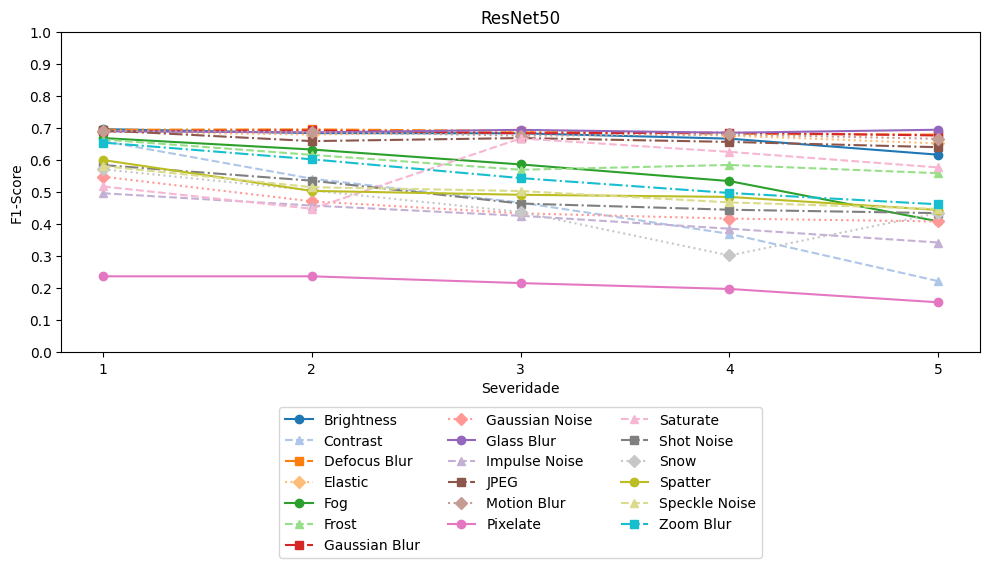

In [59]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do arquivo .xlsx
caminho_arquivo = r"C:\projeto\resultado_final_geral_bancosCorrompidos_ResNet50ModeloEscolhido.xlsx"

# Nome das colunas que você deseja extrair
colunas_desejadas = ['f1-score', 'corruption']

# Ler o arquivo Excel e selecionar as colunas desejadas
df = pd.read_excel(caminho_arquivo, usecols=colunas_desejadas)

# Exibir o DataFrame com as colunas selecionadas
print("DataFrame inicial:")
print(df)

novodf = pd.DataFrame(columns=['corruption', 'severidade', 'f1-score'])

# Iterar sobre as linhas do DataFrame
for index, row in df.iterrows():
    # String de exemplo
    string = row['corruption']
    # Dividir a string em uma lista de palavras
    parts = string.split()
    corrupcao = ''
    severidade = 0
    # Verificar se a lista tem exatamente 3 elementos
    if len(parts) == 3:
        corrupcao = parts[0]
        severidade = int(parts[2])  # Convertendo para inteiro
    elif len(parts) == 4:
        corrupcao = parts[0] + " " + parts[1]
        severidade = int(parts[3])  # Convertendo para inteiro
    
    novodf.loc[index] = [corrupcao, severidade, row['f1-score']]

print(novodf)

# Criar o gráfico
plt.figure(figsize=(10, 6))

# Lista de cores únicas para as linhas (usando uma paleta maior)
cores = plt.cm.tab20.colors  # Usa 20 cores únicas

# Lista de estilos de linhas e marcadores
linestyles = ['-', '--', '-.', ':']  # Estilos de linhas
markers = ['o', '^', 's', 'D']       # Marcadores (bolinha, triângulo, quadrado, diamante)

# Dicionário para mapear cada corrupção a uma cor única
cor_mapping = {}
cor_index = 0

# Agrupar os dados por corrupção
for i, (name, group) in enumerate(novodf.groupby('corruption')):
    # Ordenar os valores de severidade
    group = group.sort_values(by='severidade')
    
    # Atribuir uma cor única para cada corrupção
    if name not in cor_mapping:
        cor_mapping[name] = cores[cor_index]
        cor_index = (cor_index + 1) % len(cores)  # Avança para a próxima cor
    
    # Escolher o estilo de linha e marcador alternadamente
    linestyle = linestyles[i % len(linestyles)]
    marker = markers[i % len(markers)]
    
    # Plotar o gráfico com a cor única e estilo alternado
    plt.plot(group['severidade'], group['f1-score'], marker=marker, linestyle=linestyle, label=name, color=cor_mapping[name])

# Adicionar rótulos e título
plt.xlabel('Severidade')
plt.ylabel('F1-Score')
plt.title('ResNet50')

# Definir os ticks do eixo x como 1, 2, 3, 4, 5
plt.xticks([1, 2, 3, 4, 5])

# Adicionar mais ticks no eixo y
plt.yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])

# Adicionar a legenda embaixo do gráfico
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=3)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar o gráfico
plt.show()